<a href="https://colab.research.google.com/github/rladnrgus/2024-1-my-BDA/blob/main/inclass/05w_0403_wed_A_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import site
site.getsitepackages()
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
!pip install koreanize_matplotlib

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.4 MB/s eta 0:00:00


In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
pd.set_option('display.precision', 2)

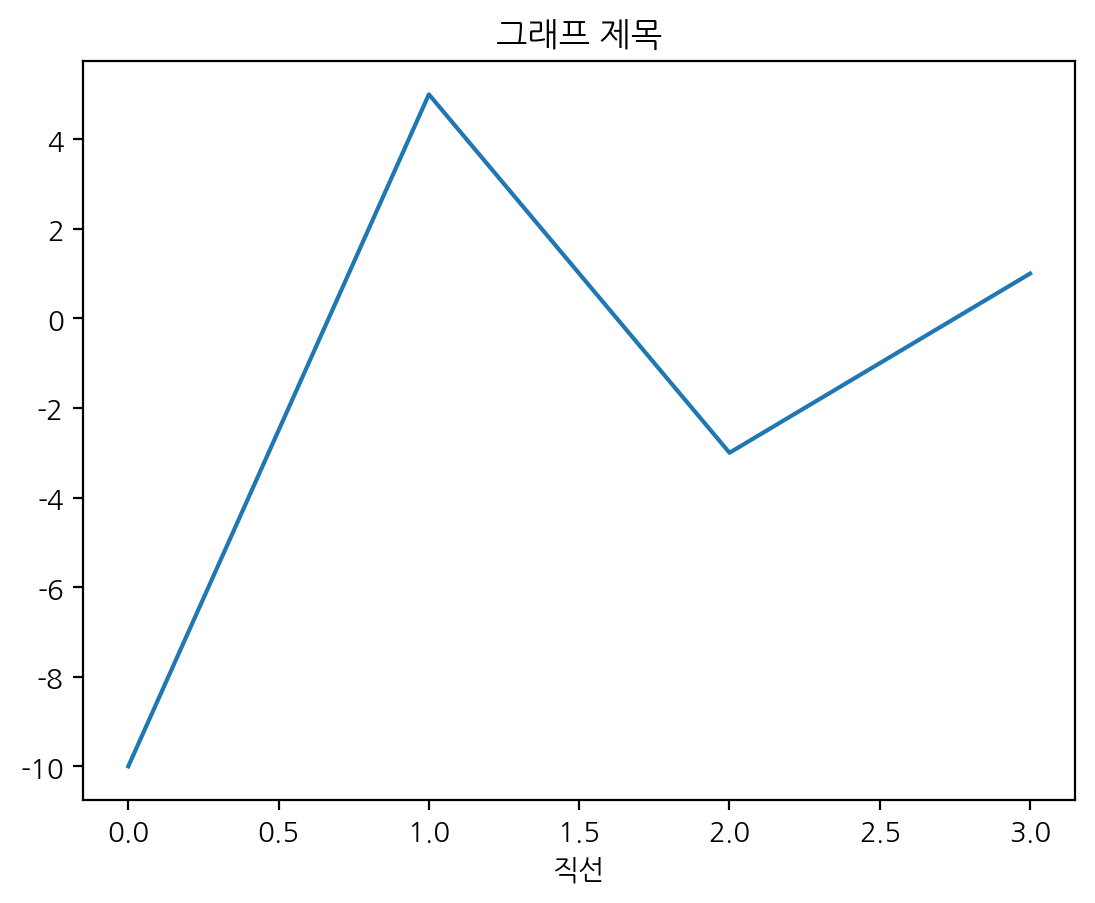

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10,5,-3,1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.56 MiB/s, done.


In [ ]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam.agg("mean")

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [ ]:
exam.agg(["mean","max","min","median"])#exam.mean()과의 차이점은 여러개를 입력 가능하며 데이터프레임으로 출력

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
max,20.0,5.0,90.00,98.0,98.00
min,1.0,1.0,20.00,56.0,12.00
median,10.5,3.0,54.00,86.5,62.50


In [ ]:
exam.agg(mean_math = ('math', 'mean'))

,math
mean_math,57.45


In [ ]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                  columns=['A','B','C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis = 0)

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis = 1)

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis = columns)

NameError: name 'columns' is not defined

### 집단별 요약 통계량 구하기

In [ ]:
exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [ ]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg(mean_math = ('math', 'max'))

,mean_math
nclass,
1,60
2,90
3,65
4,75
5,89


In [ ]:
# 인자 사용 방법: 사전 형식
# {'열명': '함수명'}
exam.groupby('nclass').agg({'math': 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
# dict of axis labels -> functions, function names or list of such.
# {'열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

In [ ]:
exam.groupby('english').agg(math_mean = ('math', 'mean'))

,math_mean
english,
56,75.00
65,65.00
68,77.00
78,85.00
80,25.00
83,78.00
85,45.00
86,45.00
87,48.00


In [ ]:
exam.groupby('nclass').agg(math_mean = ('math', 'mean'))

,math_mean
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass', as_index=False).agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


In [ ]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
range(10)

range(0, 10)

In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list(exam.groupby('nclass'))

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [ ]:
list(exam.groupby('nclass'))[0][1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:
list(exam.groupby('nclass'))[1][1]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [ ]:
for key, value in exam.groupby('nclass'):
    print(key, '\n')
    print(type(value))
    print(value, "\n", '='*40, "\n")

1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  15       4    75       56       78
15  16       4    58       98       65 

5 

<class 'pandas.core.frame.DataFrame'>
    id  ncla

In [ ]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


In [ ]:
exam.groupby('nclass').agg("mean")

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg(['mean', 'median'])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
exam.groupby('nclass')[["math", "english", "science"]].agg(['mean', 'median'])

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
exam.groupby('nclass').agg(['mean', 'median'])[["math", "english", "science"]]

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
exam.groupby('nclass')[['id']].count()

,id
nclass,
1,4
2,4
3,4
4,4
5,4


In [ ]:
exam.groupby('nclass').count()[['id']]

,id
nclass,
1,4
2,4
3,4
4,4
5,4


In [ ]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
# 제조 회사(manufacturer) 및 구동 방식별(drv) 분리
# 도심연비(cty) 평균 구하기
mpg.groupby(["manufacturer", "drv"]).mean()[["cty"]]

<ipython-input-46-2034ed1809e3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg.groupby(["manufacturer", "drv"]).mean()[["cty"]]


cty
manufacturer drv       
audi         4    16.82
             f    18.86
chevrolet    4    12.50
             f    18.80
             r    14.10
dodge        4    12.00
             f    15.82
ford         4    13.31
             r    14.75
honda        f    24.44
hyundai      f    18.64
jeep         4    13.50
land rover   4    11.50
lincoln      r    11.33
mercury      4    13.25
nissan       4    13.75
             f    20.00
pontiac      f    17.00
subaru       4    19.29
toyota       4    14.93
             f    21.37
volkswagen   f    20.93

In [ ]:
mpg.groupby(["manufacturer", "drv"])[["cty"]].mean()

cty
manufacturer drv       
audi         4    16.82
             f    18.86
chevrolet    4    12.50
             f    18.80
             r    14.10
dodge        4    12.00
             f    15.82
ford         4    13.31
             r    14.75
honda        f    24.44
hyundai      f    18.64
jeep         4    13.50
land rover   4    11.50
lincoln      r    11.33
mercury      4    13.25
nissan       4    13.75
             f    20.00
pontiac      f    17.00
subaru       4    19.29
toyota       4    14.93
             f    21.37
volkswagen   f    20.93

In [ ]:
mpg.groupby(["manufacturer", "drv"]).agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [ ]:
# 추가: 고속도로(hwy) 평균 연비
mpg.groupby(["manufacturer", "drv"]).agg(mean_cty = ('cty', 'mean'), mean_hwy = ('hwy', 'mean'))

mean_cty  mean_hwy
manufacturer drv                    
audi         4       16.82     25.27
             f       18.86     28.29
chevrolet    4       12.50     16.25
             f       18.80     27.60
             r       14.10     21.30
dodge        4       12.00     16.08
             f       15.82     22.36
ford         4       13.31     17.15
             r       14.75     21.75
honda        f       24.44     32.56
hyundai      f       18.64     26.86
jeep         4       13.50     17.62
land rover   4       11.50     16.50
lincoln      r       11.33     17.00
mercury      4       13.25     18.00
nissan       4       13.75     18.00
             f       20.00     27.56
pontiac      f       17.00     26.40
subaru       4       19.29     25.57
toyota       4       14.93     18.80
             f       21.37     29.74
volkswagen   f       20.93     29.22

In [ ]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"').groupby('drv').agg( count = ('drv', 'count'))

,count
drv,
4,11
f,7


In [ ]:
mpg.query('manufacturer == "audi"').groupby('drv').agg( count = ('drv', 'count'), mean_cty = ('cty', 'mean'))

,count,mean_cty
drv,,
4,11,16.82
f,7,18.86


In [ ]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


In [ ]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [ ]:
mpg[['drv']].value_counts()

drv
f      106
4      103
r       25
dtype: int64

In [ ]:
mpg[['drv']].value_counts().to_frame()

,0
drv,
f,106
4,103
r,25


In [ ]:
mpg[['drv', 'cyl']].value_counts()

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [ ]:
mpg[['drv', 'cyl']].value_counts().to_frame()

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [ ]:
mpg['drv'].value_counts().to_frame()

,drv
f,106
4,103
r,25


In [ ]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


In [ ]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56


In [ ]:
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56
ford,15.33
chevrolet,14.89
lincoln,14.17
land rover,14.00


In [ ]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [ ]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [ ]:
pd.merge(test1, test2)

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
pd.merge(test1, test2, how = 'inner', on = 'id')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [ ]:
pd.merge(exam, name)

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


In [ ]:
pd.merge(exam, name, how = 'inner', on = 'nclass')

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


In [ ]:
pd.merge(exam, name, how = 'left', on = 'nclass')

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


In [ ]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [ ]:
group_a  # group_a 출력

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
group_b  # group_b 출력

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [ ]:
pd.concat([group_a, group_b])

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [ ]:
pd.concat([group_a, group_b]).reset_index()

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [ ]:
group_all.reset_index(drop=True) # 원 index 제거, 새로운 시퀀스 지정

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


#**merge()시험 예상**

In [ ]:
import pandas as pd

df1 = pd.DataFrame([[1, 'apple'], [2, 'banana']], columns = ['id','fruits'])

df1

,id,fruits
0,1,apple
1,2,banana


In [ ]:
df2 = pd.DataFrame([[1, 3000], [5, 500]], columns = ['id','price'])

df2

,id,price
0,1,3000
1,5,500


In [ ]:
pd.merge(df1, df2)

,id,fruits,price
0,1,apple,3000


In [ ]:
df1.merge(df2)

,id,fruits,price
0,1,apple,3000


In [ ]:
df1.merge(df2,how='left')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN


In [ ]:
df2

,id,price
0,1,3000
1,5,500


In [ ]:
df1.merge(df2,how='right')

,id,fruits,price
0,1,apple,3000
1,5,NaN,500


In [ ]:
df1.merge(df2,how='outer')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN
2,5,NaN,500.0


In [ ]:
df1.merge(df2, how = 'cross')

,id_x,fruits,id_y,price
0,1,apple,1,3000
1,1,apple,5,500
2,2,banana,1,3000
3,2,banana,5,500


### 정리하기

In [ ]:
# 1. 데이터프레임 만들기